# A Clear Idea on Working of A Data Science Projects


<img src="MLApplicationFlow_bold.PNG" width= "300">

# Problem Statement Of the Project

Subjects receiving the same vaccine often show different levels of immune responses 
and some may even present adverse side effects to the vaccine. Systems vaccinology can 
combine omics data and machine learning techniques to obtain highly predictive 
signatures of vaccine immunogenicity and reactogenicity. Currently, several machine 
learning methods are already available to researchers with no background in 
bioinformatics.
                                

Predict how likely it is that the people will take an H1N1 flu vaccine.

# Importing all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from sklearn import metrics

# Loading the DataSet

In [2]:
df=pd.read_csv('E:\Python Imarticus\Vaccine Usage Prediction\Dataset\h1n1_vaccine_prediction.csv')

# Copying the original dataframe to new dataframe so that the original data will be not touched 

In [3]:
df1=df.copy()

# Doing Some Basic Operation of the Dataset -

1) Checking the five five rows of the Dataset.

2) Checking the last five rows of the Dataset.

3) Shape of the Dataset.

4) Information of the Dataset.

5) Description of the Dataset.

In [4]:
#Checking the first five rows of the dataset
df1.head(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [5]:
#Checking the last five rows of the dataset
df1.tail(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0


In [6]:
# Checking the shape of the dataset 
print('The shape of the dataset :',df1.shape)

The shape of the dataset : (26707, 34)


In [7]:
#Checking the Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

The dataset contain 34 columns so It will be better to seperate the column into numerical_features and Categorical_features and then understanding the data.

In [8]:
# Checking the Target Variable and its value_counts

df1['h1n1_vaccine'].value_counts(normalize=True)

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

We can clearly see that the target variable is imbalanced So we need to figure it out and handle it

# FEATURE ENGINEERING - COMMON ISSUES IN THE DATASET

1) MISSING DATA.

2) CATEGORICAL VARIABLE-CARDINALITY.

3) CATEGORICAL VARIABLE- RARE LABELS.

4) LINEAR MODEL ASSUMPTIONS.

5) VARIABLE DISTRIBUTION.

# Seperating Categorical Features and Numerical Feature to better understand and handle it in a proper way.

In [9]:
numerical_features=df1.select_dtypes(include=['int64','float64'])
categorical_features=df1.select_dtypes(include=['object'])

In [10]:
#Checking the missing values in the numerical_features
numerical_features.isnull().sum()/len(numerical_features)

unique_id                    0.000000
h1n1_worry                   0.003445
h1n1_awareness               0.004343
antiviral_medication         0.002658
contact_avoidance            0.007788
bought_face_mask             0.000711
wash_hands_frequently        0.001573
avoid_large_gatherings       0.003258
reduced_outside_home_cont    0.003070
avoid_touch_face             0.004793
dr_recc_h1n1_vacc            0.080878
dr_recc_seasonal_vacc        0.080878
chronic_medic_condition      0.036358
cont_child_undr_6_mnths      0.030704
is_health_worker             0.030104
has_health_insur             0.459580
is_h1n1_vacc_effective       0.014640
is_h1n1_risky                0.014528
sick_from_h1n1_vacc          0.014790
is_seas_vacc_effective       0.017299
is_seas_risky                0.019246
sick_from_seas_vacc          0.020107
no_of_adults                 0.009323
no_of_children               0.009323
h1n1_vaccine                 0.000000
dtype: float64

from the dataframe information that we have seen in the previous cell,there are missing values in the dataset that needed to be figured out

In [11]:
#dropping irrelvant column unique_id from the dataset


numerical_features.drop(columns='unique_id',axis=1,inplace=True)

C:\Users\Asif\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# MISSING VALUES - FEATURE ENGINEERING 

What are the different types of Missing Data?

1) Missing Completely at Random, MCAR: A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

2) Missing Data Not At Random- there is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

3) Missing at Random(MAR) - E.g Men hide their age and Women hide their Salary.

# Handling Missing Data in Numerical Features


Techniques Associated with Missing Data -

1) Mean-Median-Mode Replacement.

2) Random Sample Imputation.

3) Capturing NAN with a new Feature.

4) End of Distribution Imputation.

5) Arbitrary Imputation.

6) Frequency Category Imputation.

In [12]:
# Checking all the numerical features for the process and retreival of the features_name easily
numerical_features.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine'],
      dtype='object')

# Making A Function to impute nan values for the data

In [13]:
def imputenan_value(dataframe,columns):
        dataframe=dataframe[columns].fillna(dataframe[columns].mode()[0])
        return dataframej

In [14]:
import warnings

warnings.filterwarnings("ignore")
numerical_features['h1n1_worry']=imputenan_value(numerical_features,'h1n1_worry')
numerical_features['h1n1_awareness']=imputenan_value(numerical_features,'h1n1_awareness')
numerical_features['antiviral_medication']=imputenan_value(numerical_features,'antiviral_medication')
numerical_features['contact_avoidance']=imputenan_value(numerical_features,'contact_avoidance')
numerical_features['bought_face_mask']=imputenan_value(numerical_features,'bought_face_mask')
numerical_features['wash_hands_frequently']=imputenan_value(numerical_features,'wash_hands_frequently')
numerical_features['avoid_large_gatherings']=imputenan_value(numerical_features,'avoid_large_gatherings')
numerical_features['reduced_outside_home_cont']=imputenan_value(numerical_features,'reduced_outside_home_cont')
numerical_features['avoid_touch_face']=imputenan_value(numerical_features,'avoid_touch_face')
numerical_features['dr_recc_h1n1_vacc']=imputenan_value(numerical_features,'dr_recc_h1n1_vacc')
numerical_features['dr_recc_seasonal_vacc']=imputenan_value(numerical_features,'dr_recc_seasonal_vacc')
numerical_features['chronic_medic_condition']=imputenan_value(numerical_features,'chronic_medic_condition')
numerical_features['cont_child_undr_6_mnths']=imputenan_value(numerical_features,'cont_child_undr_6_mnths')
numerical_features['is_health_worker']=imputenan_value(numerical_features,'is_health_worker')
numerical_features['has_health_insur']=imputenan_value(numerical_features,'has_health_insur')
numerical_features['is_h1n1_vacc_effective']=imputenan_value(numerical_features,'is_h1n1_vacc_effective')
numerical_features['is_h1n1_risky']=imputenan_value(numerical_features,'is_h1n1_risky')
numerical_features['sick_from_h1n1_vacc']=imputenan_value(numerical_features,'sick_from_h1n1_vacc')
numerical_features['is_seas_vacc_effective']=imputenan_value(numerical_features,'is_seas_vacc_effective')
numerical_features['is_seas_risky']=imputenan_value(numerical_features,'is_seas_risky')
numerical_features['sick_from_seas_vacc']=imputenan_value(numerical_features,'sick_from_seas_vacc')
numerical_features['no_of_adults']=imputenan_value(numerical_features,'no_of_adults')
numerical_features['no_of_children']=imputenan_value(numerical_features,'no_of_children')

In [15]:
numerical_features['h1n1_worry'].value_counts()

2.0    10667
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_worry, dtype: int64

# Checking if the function is applied correctly or not

In [16]:
numerical_features.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

We have sucessfully handled missing value in the dataset.Now we will move on handling categorical features in the dataset

# HANDLING CATEGORICAL FEATURES IN THE DATA

1) Most Machine Learning Algorithms and deep neural networks require numerical inputs.This mto beans that if we have categorical data we must first encode it to numbers in order to build that actually work.

2) The goals of categorical encoding is to provide variables we can use to train machine learning algorithms and build predictive features from categorical


Traditional Technique:-

1) One-Hot Encoding

2) Count or Frequency Encoding

3) Ordinal or Label Encoding


Monotonic Relationship:-

1) Ordered Label Encoding

2) Mean Encoding

3) Probability Encoding

4) Weight of Evidence Encoding


Alternative Techique:-

1) Rare Label Encoding

2) Binary Encoding

In [17]:
# Checking how many columns are there to handle missing data in the categorical features
categorical_features.columns

Index(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa'],
      dtype='object')

# Making a function to check unique category in any feature.

In [18]:
def unique_category(dataframe,columns):
    dataframe=dataframe[columns].unique()
    return dataframe

In [19]:
print('Age_bracket -',unique_category(categorical_features,'age_bracket'))
print()
print('qualification-',unique_category(categorical_features,'qualification'))
print()
print('race-',unique_category(categorical_features,'race'))
print()
print('sex-',unique_category(categorical_features,'sex'))
print()
print('income_level-',unique_category(categorical_features,'income_level'))
print()
print('marital_status-',unique_category(categorical_features,'marital_status'))
print()
print('housing_status-',unique_category(categorical_features,'housing_status'))
print()
print('employment-',unique_category(categorical_features,'employment'))
print()
print('census_msa-',unique_category(categorical_features,'census_msa'))

Age_bracket - ['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']

qualification- ['< 12 Years' '12 Years' 'College Graduate' 'Some College' nan]

race- ['White' 'Black' 'Other or Multiple' 'Hispanic']

sex- ['Female' 'Male']

income_level- ['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' nan]

marital_status- ['Not Married' 'Married' nan]

housing_status- ['Own' 'Rent' nan]

employment- ['Not in Labor Force' 'Employed' 'Unemployed' nan]

census_msa- ['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']


In [20]:
# Checking the missing data in the categorical data

categorical_features.isnull().sum()/len(categorical_features)

age_bracket       0.000000
qualification     0.052683
race              0.000000
sex               0.000000
income_level      0.165612
marital_status    0.052720
housing_status    0.076459
employment        0.054780
census_msa        0.000000
dtype: float64

In [192]:
categorical_featuresnull=categorical_features

In [193]:
categorical_featuresnull

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City"
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City"
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA


In [194]:
categorical_featuresnull['qualification']=categorical_featuresnull['qualification'].fillna('Others')

In [195]:
categorical_featuresnull['qualification'].value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Others               1407
Name: qualification, dtype: int64

In [196]:
categorical_featuresnull['income_level']=categorical_featuresnull['income_level'].fillna('Not Applicable')
categorical_featuresnull['income_level'].value_counts()

<= $75,000, Above Poverty    12777
> $75,000                     6810
Not Applicable                4423
Below Poverty                 2697
Name: income_level, dtype: int64

In [197]:
categorical_featuresnull['employment']=categorical_featuresnull['employment'].fillna('Not Applicable')
categorical_featuresnull['employment'].value_counts()

Employed              13560
Not in Labor Force    10231
Not Applicable         1463
Unemployed             1453
Name: employment, dtype: int64

In [215]:
categorical_featuresnull.dropna(subset=['marital_status'],inplace=True)

In [216]:
categorical_featuresnull.isnull().sum()

age_bracket         0
qualification       0
race                0
sex                 0
income_level        0
marital_status      0
housing_status    757
employment          0
census_msa          0
dtype: int64

In [217]:
categorical_featuresnull['marital_status'].value_counts()

Married        13555
Not Married    11744
Name: marital_status, dtype: int64

In [219]:
categorical_featuresnull['housing_status'].isnull().sum()/len(categorical_featuresnull)

0.029922131309537928

In [221]:
categorical_featuresnull.dropna(subset=['housing_status'],inplace=True)
categorical_featuresnull['housing_status'].value_counts()

Own     18642
Rent     5900
Name: housing_status, dtype: int64

In [222]:
categorical_featuresnull.isnull().sum()

age_bracket       0
qualification     0
race              0
sex               0
income_level      0
marital_status    0
housing_status    0
employment        0
census_msa        0
dtype: int64

In [21]:
# Handling Missing Data 
categorical_features['qualification']=categorical_features['qualification'].fillna('Others')
categorical_features['income_level']=categorical_features['income_level'].fillna('Not Applicable')
categorical_features['employment']=categorical_features['employment'].fillna('Not Applicable')
categorical_features.dropna(subset=['marital_status'],inplace=True)
categorical_features.dropna(subset=['housing_status'],inplace=True)

In [22]:
# Checking if the applied thing is correct or not
print(categorical_features['qualification'].value_counts())
print()
print(categorical_features['income_level'].value_counts())
print()
print(categorical_features['employment'].value_counts())
print()
print(categorical_features['marital_status'].value_counts())
print()
print(categorical_features['housing_status'].value_counts())

College Graduate    9817
Some College        6827
12 Years            5546
< 12 Years          2238
Others               114
Name: qualification, dtype: int64

<= $75,000, Above Poverty    12593
> $75,000                     6766
Below Poverty                 2639
Not Applicable                2544
Name: income_level, dtype: int64

Employed              13172
Not in Labor Force     9882
Unemployed             1396
Not Applicable           92
Name: employment, dtype: int64

Married        13164
Not Married    11378
Name: marital_status, dtype: int64

Own     18642
Rent     5900
Name: housing_status, dtype: int64


# Exploratory Data Analysis - Find insights from the Data

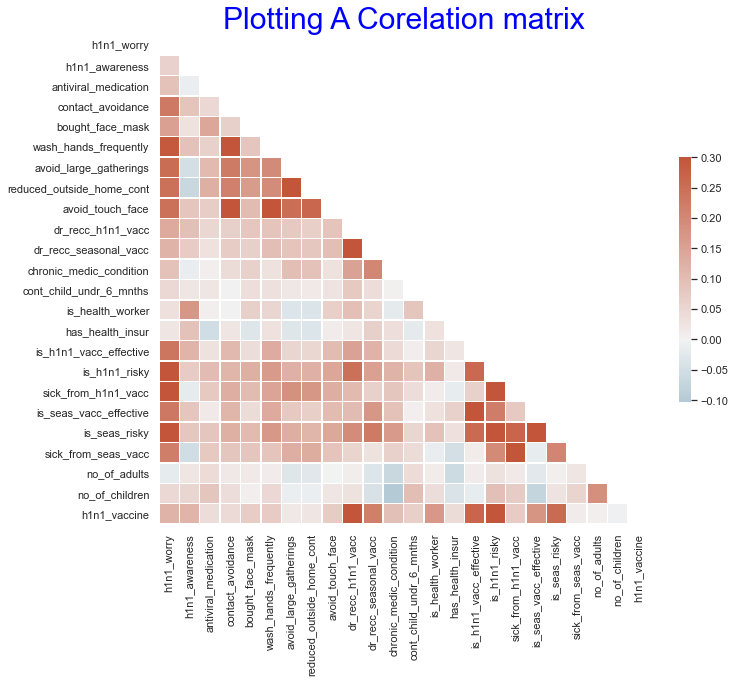

In [24]:
#Plotting A Diagonally Corelation Matrix
sns.set_theme(style="white")
# Compute the correlation matrix
corr = numerical_features.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
ax.set_title('Plotting A Corelation matrix',fontdict={'fontsize':30,'color':'blue'})
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [24]:
#Checking the columns of the dataset
numerical_features.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine'],
      dtype='object')

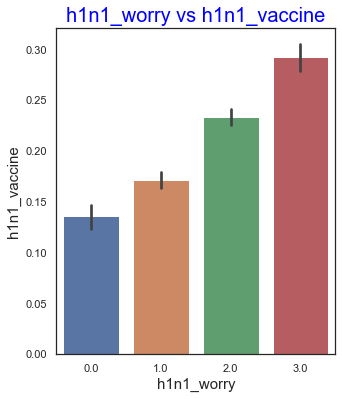

In [25]:
#has worring_factor increased the chance of person getting the h1n1_vaccine.Let see
#Worry about the h1n1 flu(0,1,2,3) 0=Not worried at all, 1=Not very worried, 2=Somewhat worried, 3=Very worried
fig,ax=plt.subplots(figsize=(5,6))
ax.set_title('h1n1_worry vs h1n1_vaccine',fontdict={'fontsize':20,'color':'blue'})
plt.xlabel(xlabel='h1n1_worry',fontdict={'fontsize':15})
plt.ylabel(ylabel='h1n1_vaccine',fontdict={'fontsize':15})
sns.barplot(x='h1n1_worry',y='h1n1_vaccine',data=numerical_features)
plt.show()

Yes the worring_factor has surely increase the chance of person getting the h1n1 vaccine.

Category 3 has 27% higher chances of getting vaccine than category 2,1 and 0 

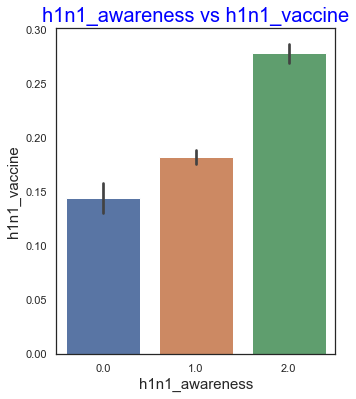

In [26]:
# has h1n1 awareness factor results in person getting vaccine or not

fig,ax=plt.subplots(figsize=(5,6))
ax.set_title('h1n1_awareness vs h1n1_vaccine',fontdict={'fontsize':20,'color':'blue'})
plt.xlabel(xlabel='h1n1_awareness',fontdict={'fontsize':15})
plt.ylabel(ylabel='h1n1_vaccine',fontdict={'fontsize':15})
sns.barplot(x='h1n1_awareness',y='h1n1_vaccine',data=numerical_features)
plt.show()

Yes the awareness_factor has surely increasing the chances of getting the person vaccinated:-

1. 28% of the knowledgable awareness has 28% higher chance of getting vaccine than category 1,0

2. Combined chance of person in category 1 and category 0 is 31% chance (which is good) considering they are not aware of it.

Now the person who is aware(h1n1_awareness) that the h1n1 disease is there will take necessary precaution so that he will  
not get the disease.

There are multiple ways to take precaution in order to avoid the disease(This are same feature we need to analyze and relate):-

1. contact_avoidance

2. bought_face_mask

3. wash_hand_frequently

4. avoid_large_gatherings 

5. reduced_outside_home_cont 

6. avoid_touch_face 

7. dr_recc_h1n1_vacc

In [27]:
#Antiviral drugs are a class of medication used for treating viral infections. 
#Most antivirals target specific viruses, while a broad-spectrum antiviral is effective against a wide range of viruses. Unlike most antibiotics, antiviral drugs do not destroy their target pathogen; instead they inhibit its development.

numerical_features['antiviral_medication'].value_counts(normalize=True)

0.0    0.951286
1.0    0.048714
Name: antiviral_medication, dtype: float64

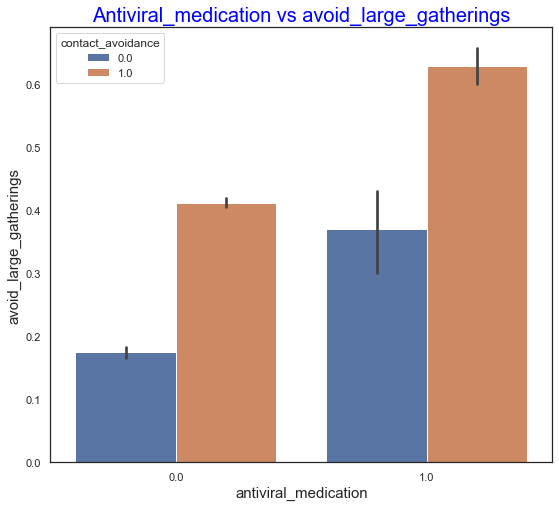

In [28]:
#The person having some viral infection and has taken antiviral medication is attending public_gathering and also contacting
#with people.Let's check
fig,ax=plt.subplots(figsize=(9,8))
ax.set_title('Antiviral_medication vs avoid_large_gatherings' ,fontdict={'fontsize':20,'color':'blue'})
plt.xlabel(xlabel='antiviral_medication',fontdict={'fontsize':15})
plt.ylabel(ylabel='avoid_large_gatherings',fontdict={'fontsize':15})
sns.barplot(x='antiviral_medication',y='avoid_large_gatherings',hue='contact_avoidance',data=numerical_features)
plt.show()

 The person taking antiviral medication is mostly avoiding the public_gathering and contacting with people(Which is very good) but
   there are still 38% people who are still contacting with people(which is bad considering they have viral infection and  can spread it)
 
Meaning they are following precaution measures and are aware about the situation around

In [29]:
numerical_features['reduced_outside_home_cont'].value_counts()

0.0    17726
1.0     8981
Name: reduced_outside_home_cont, dtype: int64

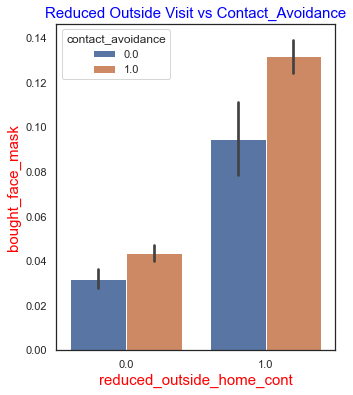

In [30]:
#reduced_outside_home_cont,avoid_touch_face
#Has avoided any close contact with people who have-contact_avoidance flu-like symptoms - (0,1)
fig,ax=plt.subplots(figsize=(5,6))
ax.set_title('Reduced Outside Visit vs Contact_Avoidance',fontdict={'fontsize':15,'color':'blue'})
plt.xlabel(xlabel='reduced_outside_home_cont',fontdict={'fontsize':15,'color':'red'})
plt.ylabel(ylabel='bought_face_mask',fontdict={'fontsize':15,'color':'red'})
ax.get_ylabel()
sns.barplot(x='reduced_outside_home_cont',y='bought_face_mask',hue='contact_avoidance',data=numerical_features,ax=ax)
ax.get_legend()
plt.show()

This is a very good insight about the data:-

1. The person who are in contact with the flu virus has bought face mask to protect themselves(which is a good thing) considering they are going  out sometimes

2. The person who are not contact with the flu virus or not going outside of their home are buying less face masks

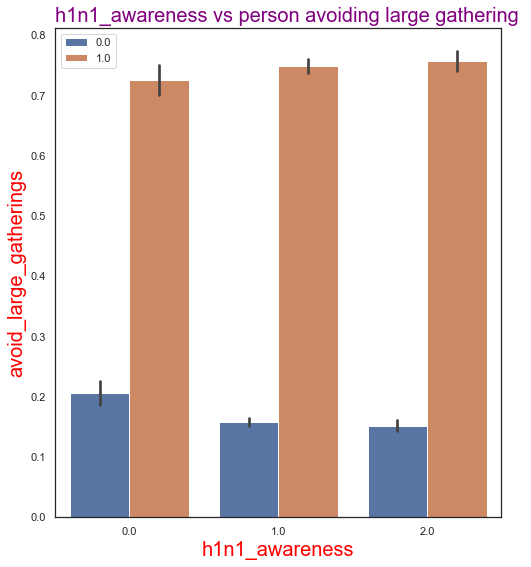

In [31]:
fig,ax=plt.subplots(figsize=(8,9))
ax.set_title('h1n1_awareness vs person avoiding large gathering ',fontdict={'fontsize':20,'color':'purple'},loc='left')
plt.xlabel(xlabel='h1n1_awareness',fontdict={'fontsize':20,'color':'red'})
plt.ylabel(ylabel='avoid_large_gatherings',fontdict={'fontsize':20,'color':'red'})
sns.barplot(x='h1n1_awareness',y='avoid_large_gatherings',hue='reduced_outside_home_cont',data=numerical_features)
plt.legend()
plt.show()

This graph show that 70% of the approximate public are avoid large gathering as well as reducing outside visit in aware of 
the h1n1 influenza virus 

In [32]:
# Checking the recommendation of the doctors to vaccinate the h1n1_vaccine(is it worth)
vaccine_recommended_by_doctors=pd.DataFrame(numerical_features.groupby('dr_recc_h1n1_vacc')['h1n1_vaccine'].value_counts(normalize=True))

In [33]:
vaccine_recommended_by_doctors

h1n1_vaccine
dr_recc_h1n1_vacc h1n1_vaccine              
0.0               0                 0.868773
                  1                 0.131227
1.0               1                 0.532359
                  0                 0.467641

After recommendation of the doctor 53% of the people got vaccinated and 12% of the people got vaccinated without going to
the doctors(may be they were aware of the situation)

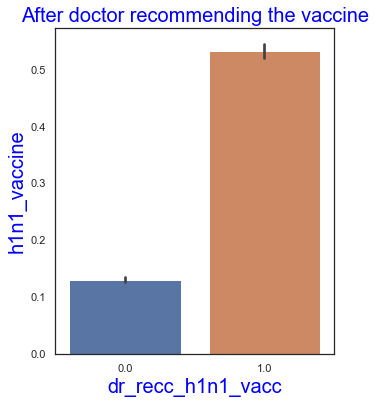

In [34]:
fig,ax=plt.subplots(figsize=(5,6))
ax.set_title('After doctor recommending the vaccine',fontdict={'fontsize':20,'color':'blue'})
plt.xlabel(xlabel='dr_recc_h1n1_vacc',fontdict={'fontsize':20,'color':'blue'})
plt.ylabel(ylabel='h1n1_vaccine',fontdict={'fontsize':20,'color':'blue'})
sns.barplot(x='dr_recc_h1n1_vacc',y='h1n1_vaccine',data=numerical_features)
plt.show()

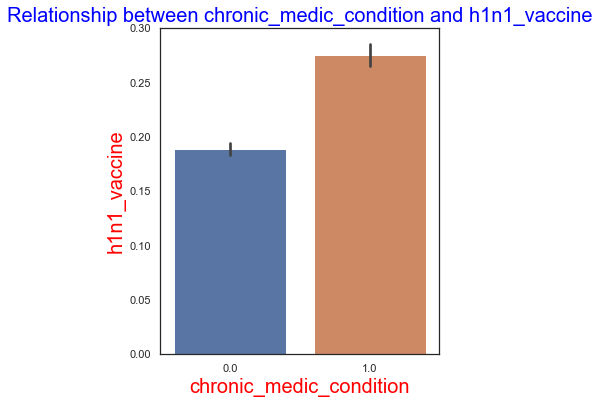

In [35]:
fig,ax=plt.subplots(figsize=(5,6))
ax.set_title('Relationship between chronic_medic_condition and h1n1_vaccine',fontdict={'fontsize':20,'color':'blue'})
plt.xlabel(xlabel='chronic_medic_condition',fontdict={'fontsize':20,'color':'red'})
plt.ylabel(ylabel='h1n1_vaccine',fontdict={'fontsize':20,'color':'red'})
sns.barplot(x='chronic_medic_condition',y='h1n1_vaccine',data=numerical_features)
plt.show()

#Relationship between chronic_medic_condition and h1n1_vaccine

25% of the chronic_medic_condition has vaccinated with the h1n1_vaccine because they are more susceptible to getting infected
with the disease

In [36]:
data_is_health_worker=pd.DataFrame(numerical_features.groupby('h1n1_vaccine')['is_health_worker'].value_counts(normalize=True))

In [37]:
data_is_health_worker

is_health_worker
h1n1_vaccine is_health_worker                  
0            0.0                       0.918604
             1.0                       0.081396
1            0.0                       0.790800
             1.0                       0.209200

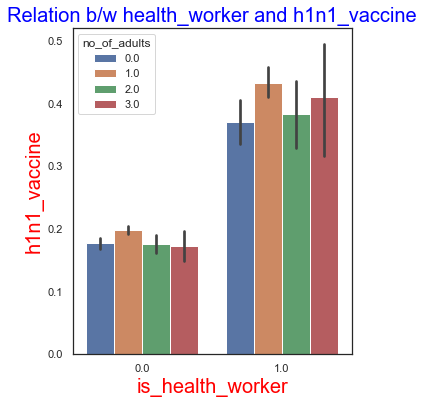

In [38]:
fig,ax=plt.subplots(figsize=(5,6))
ax.set_title('Relation b/w health_worker and h1n1_vaccine',fontdict={'fontsize':20,'color':'blue'})
plt.xlabel(xlabel='is_health_worker',fontdict={'fontsize':20,'color':'red'})
plt.ylabel(ylabel='h1n1_vaccine',fontdict={'fontsize':20,'color':'red'})
sns.barplot(x='is_health_worker',y='h1n1_vaccine',hue='no_of_adults',data=numerical_features)
plt.show()

#Relationship between health_worker and h1n1_vaccine with respect to no_of_adults:-

There is greater chance of health_worker family to be vaccinated with h1n1 vaccine rather than the person who is not a 
health_worker because they are more aware of the situation

In [39]:
data_health_insur=pd.DataFrame(numerical_features.groupby(['has_health_insur','is_health_worker'])['h1n1_vaccine'].value_counts(normalize=True))

In [40]:
data_health_insur

h1n1_vaccine
has_health_insur is_health_worker h1n1_vaccine              
0.0              0.0              0                 0.865385
                                  1                 0.134615
                 1.0              0                 0.685484
                                  1                 0.314516
1.0              0.0              0                 0.807623
                                  1                 0.192377
                 1.0              0                 0.586306
                                  1                 0.413694

There is a strong relationship between person getting a vaccine when he is having health_insur

In [442]:
pd.DataFrame(numerical_features.groupby(['h1n1_vaccine','no_of_adults'])['is_h1n1_vacc_effective'].value_counts(normalize=True))

is_h1n1_vacc_effective
h1n1_vaccine no_of_adults is_h1n1_vacc_effective                        
0            0.0          4.0                                   0.439036
                          3.0                                   0.237830
                          5.0                                   0.206769
                          2.0                                   0.076650
                          1.0                                   0.039716
             1.0          4.0                                   0.488834
                          5.0                                   0.197828
                          3.0                                   0.189246
                          2.0                                   0.085472
                          1.0                                   0.038620
             2.0          4.0                                   0.475446
                          5.0                                   0.207143
                          3.0                                   0.177232
                          2.0                                   0.095089
                          1.0                                   0.045089
             3.0          4.0                                   0.497231
                          5.0                                   0.225914
                          3.0                                   0.140642
                          2.0                                   0.086379
                          1.0                                   0.049834
1            0.0          5.0                                   0.529338
                          4.0                                   0.342587
                          3.0                                   0.103470
                          2.0                                   0.015773
                          1.0                                   0.008833
             1.0          5.0                                   0.507869
                          4.0                                   0.383475
                          3.0                                   0.086259
                          2.0                                   0.016041
                          1.0                                   0.006356
             2.0          5.0                                   0.484902
                          4.0                                   0.424512
                          3.0                                   0.058615
                          2.0                                   0.021314
                          1.0                                   0.010657
             3.0          5.0                                   0.500000
                          4.0                                   0.396396
                          3.0                                   0.076577
                          2.0                                   0.022523
                          1.0                                   0.004505

In [41]:
filter_adults_equalzero=numerical_features[numerical_features['no_of_adults']==0]

In [42]:
filter_adults_equalzero.groupby('no_of_adults')['h1n1_vaccine'].value_counts(normalize=True)

no_of_adults  h1n1_vaccine
0.0           0               0.803252
              1               0.196748
Name: h1n1_vaccine, dtype: float64

In [445]:
numerical_features.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine'],
      dtype='object')

In [43]:
pd.DataFrame(numerical_features.groupby(['cont_child_undr_6_mnths','no_of_adults'])['h1n1_vaccine'].value_counts(normalize=True))

h1n1_vaccine
cont_child_undr_6_mnths no_of_adults h1n1_vaccine              
0.0                     0.0          0                 0.809291
                                     1                 0.190709
                        1.0          0                 0.783979
                                     1                 0.216021
                        2.0          0                 0.807182
                                     1                 0.192818
                        3.0          0                 0.818913
                                     1                 0.181087
1.0                     0.0          0                 0.712000
                                     1                 0.288000
                        1.0          0                 0.686414
                                     1                 0.313586
                        2.0          0                 0.713693
                                     1                 0.286307
                        3.0          0                 0.679389
                                     1                 0.320611

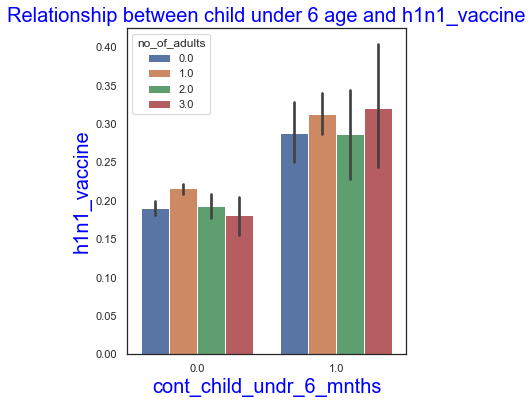

In [44]:
fig,ax=plt.subplots(figsize=(5,6))
ax.set_title('Relationship between child under 6 age and h1n1_vaccine',fontdict={'fontsize':20,'color':'blue'})
plt.xlabel(xlabel='cont_child_undr_6_mnths',fontdict={'fontsize':20,'color':'blue'})
plt.ylabel(ylabel='h1n1_vaccine',fontdict={'fontsize':20,'color':'blue'})
sns.barplot(x='cont_child_undr_6_mnths',y='h1n1_vaccine',hue='no_of_adults',data=numerical_features)
plt.show()

In [45]:
numerical_features['is_h1n1_vacc_effective'].value_counts(normalize=True)

4.0    0.452091
5.0    0.268319
3.0    0.176845
2.0    0.069570
1.0    0.033175
Name: is_h1n1_vacc_effective, dtype: float64

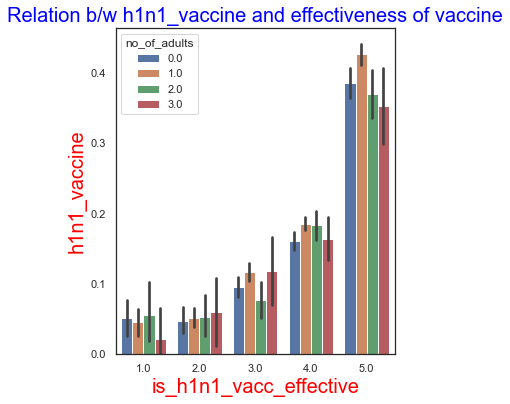

In [46]:
fig,ax=plt.subplots(figsize=(5,6))
ax.set_title('Relation b/w h1n1_vaccine and effectiveness of vaccine',fontdict={'fontsize':20,'color':'blue'})
plt.xlabel(xlabel='is_h1n1_vacc_effective',fontdict={'fontsize':20,'color':'red'})
plt.ylabel(ylabel='h1n1_vaccine',fontdict={'fontsize':20,'color':'red'})
sns.barplot(x='is_h1n1_vacc_effective',y='h1n1_vaccine',hue='no_of_adults',data=numerical_features)
plt.show()

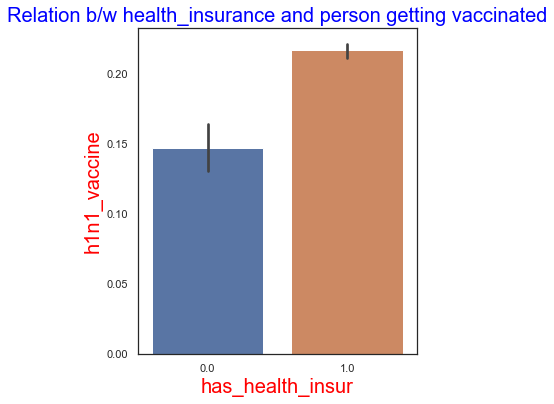

In [47]:
fig,ax=plt.subplots(figsize=(5,6))
ax.set_title('Relation b/w health_insurance and person getting vaccinated',fontdict={'fontsize':20,'color':'blue'})
plt.xlabel(xlabel='has_health_insur',fontdict={'fontsize':20,'color':'red'})
plt.ylabel(ylabel='h1n1_vaccine',fontdict={'fontsize':20,'color':'red'})
sns.barplot(x='has_health_insur',y='h1n1_vaccine',data=numerical_features)
plt.show()

In [48]:
numerical_features.groupby('h1n1_vaccine')['is_h1n1_risky'].value_counts(normalize=True)

h1n1_vaccine  is_h1n1_risky
0             2.0              0.406742
              1.0              0.352779
              4.0              0.155898
              3.0              0.043883
              5.0              0.040698
1             4.0              0.372753
              2.0              0.308777
              5.0              0.157561
              1.0              0.126718
              3.0              0.034191
Name: is_h1n1_risky, dtype: float64

checking the relationship between h1n1_vaccine and risky_factor

1. The risk_level decreases as we vaccinate ourselves
2. The risk_level increase when the person is not aware about the situation like we see in Category 1 and Category 2 Where
risk_factor is the highest.

In [49]:
numerical_features.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine'],
      dtype='object')

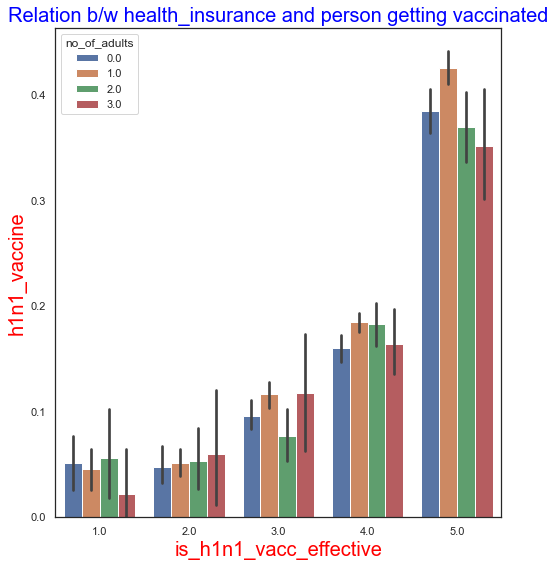

In [50]:
fig,ax=plt.subplots(figsize=(8,9))
ax.set_title('Relation b/w health_insurance and person getting vaccinated',fontdict={'fontsize':20,'color':'blue'})
plt.xlabel(xlabel='is_h1n1_vacc_effective',fontdict={'fontsize':20,'color':'red'})
plt.ylabel(ylabel='h1n1_vaccine',fontdict={'fontsize':20,'color':'red'})
sns.barplot(x='is_h1n1_vacc_effective',y='h1n1_vaccine',hue='no_of_adults',data=numerical_features)
plt.show()

<AxesSubplot:xlabel='is_h1n1_risky', ylabel='sick_from_h1n1_vacc'>

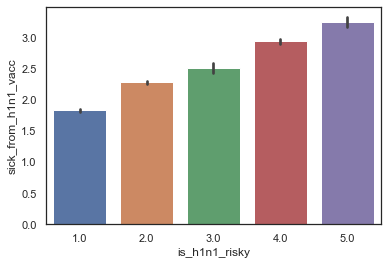

In [51]:
sns.barplot(x='is_h1n1_risky',y='sick_from_h1n1_vacc',data=numerical_features)

In [52]:
numerical_features['no_of_adults'].value_counts(normalize=True)

1.0    0.551279
0.0    0.301644
2.0    0.104954
3.0    0.042124
Name: no_of_adults, dtype: float64

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='is_h1n1_vacc_effective'>

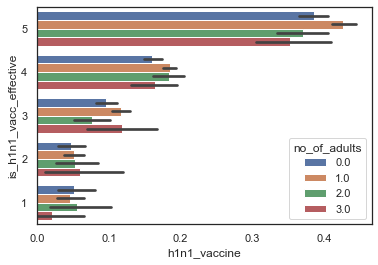

In [53]:
sns.barplot(x='h1n1_vaccine',y='is_h1n1_vacc_effective',hue='no_of_adults',orient='h',order=[5,4,3,2,1],data=numerical_features)

<AxesSubplot:xlabel='sick_from_h1n1_vacc', ylabel='h1n1_vaccine'>

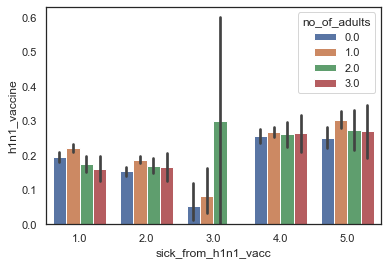

In [54]:
sns.barplot(x='sick_from_h1n1_vacc',y='h1n1_vaccine',hue='no_of_adults',data=numerical_features)

In [55]:
#Seasonal Vaccine(UnExplored Topics)
#Doing EDA For categorical Features
categorical_features.columns

Index(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa'],
      dtype='object')

In [56]:
def unique_and_counts(dataframe,columns):
    dataframe=dataframe[columns].unique()
    return dataframe

In [57]:
print('Age Bracket unique values')
print(unique_and_counts(categorical_features,'age_bracket'))
print('Qualification unique values')
print(unique_and_counts(categorical_features,'qualification'))
print('race unique values')
print(unique_and_counts(categorical_features,'sex'))
print('income_level unique values')
print(unique_and_counts(categorical_features,'income_level'))
print('marital_status unique_values')
print(unique_and_counts(categorical_features,'marital_status'))
print('housing_status unique values')
print(unique_and_counts(categorical_features,'housing_status'))
print('employment unique values')
print(unique_and_counts(categorical_features,'employment'))
print('census_msa unique_values')
print(unique_and_counts(categorical_features,'census_msa'))

Age Bracket unique values
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
Qualification unique values
['< 12 Years' '12 Years' 'College Graduate' 'Some College' 'Others']
race unique values
['Female' 'Male']
income_level unique values
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' 'Not Applicable']
marital_status unique_values
['Not Married' 'Married']
housing_status unique values
['Own' 'Rent']
employment unique values
['Not in Labor Force' 'Employed' 'Unemployed' 'Not Applicable']
census_msa unique_values
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']


In [58]:
#Checking the missing values in the categorical features
categorical_features.isnull().sum()/len(df)*100

age_bracket       0.0
qualification     0.0
race              0.0
sex               0.0
income_level      0.0
marital_status    0.0
housing_status    0.0
employment        0.0
census_msa        0.0
dtype: float64

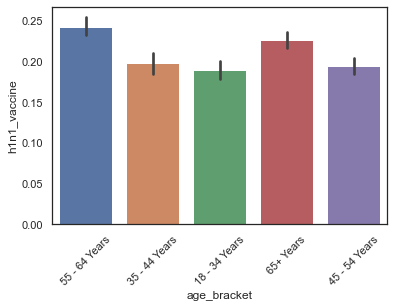

In [59]:
sns.barplot(x='age_bracket',y='h1n1_vaccine',data=df1)
plt.xticks(rotation=45)
plt.show()

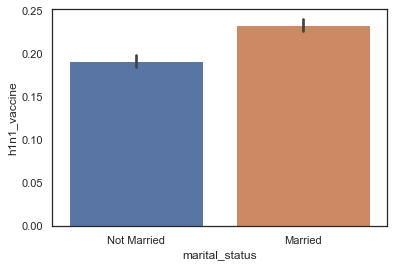

In [60]:
sns.barplot(x='marital_status',y='h1n1_vaccine',data=df1)
plt.show()

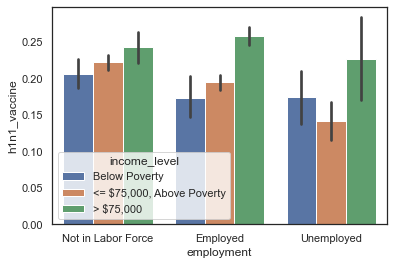

In [61]:
sns.barplot(x='employment',y='h1n1_vaccine',hue='income_level',data=df1)
plt.show()

In [62]:
numeric=numerical_features[numerical_features['no_of_adults']>0]

In [63]:
numeric

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,5.0,2.0,1.0,5.0,4.0,4.0,2.0,3.0,0
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,5.0,2.0,1.0,4.0,2.0,1.0,2.0,0.0,1
8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,4.0,1.0,1.0,4.0,2.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,4.0,2.0,5.0,5.0,4.0,5.0,1.0,0.0,0
26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,4.0,2.0,4.0,4.0,2.0,4.0,3.0,0.0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0,0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0,0


In [64]:
numeric.reset_index(inplace=True)

In [483]:
numeric.drop(['unique_id'],axis=1,inplace=True)

c:\users\asif\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [65]:
numeric.shape

(18651, 25)

In [23]:
def label_categorical(dataframe,columns):
    label_encoder=preprocessing.LabelEncoder()
    dataframe[columns]=label_encoder.fit_transform(dataframe[columns])
    return dataframe

In [24]:
label_categorical(categorical_features,'age_bracket')

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,3,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,1,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,0,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,4,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,2,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...
26702,4,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA
26703,0,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City"
26704,3,Some College,White,Female,Not Applicable,Not Married,Own,Not Applicable,"MSA, Not Principle City"
26705,0,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA


In [25]:
categorical_features['qualification']=label_categorical(categorical_features,'qualification')
categorical_features['race']=label_categorical(categorical_features,'race')
categorical_features['sex']=label_categorical(categorical_features,'sex')
categorical_features['income_level']=label_categorical(categorical_features,'income_level')
categorical_features['marital_status']=label_categorical(categorical_features,'marital_status')
categorical_features['housing_status']=label_categorical(categorical_features,'housing_status')
categorical_features['employment']=label_categorical(categorical_features,'employment')
categorical_features['census_msa']=label_categorical(categorical_features,'census_msa')

In [26]:
categorical_features.head()

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,3,3,3,3,3,3,3,3,3
1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0
3,4,4,4,4,4,4,4,4,4
4,2,2,2,2,2,2,2,2,2


In [27]:
categorical_features.isnull().sum()

age_bracket       0
qualification     0
race              0
sex               0
income_level      0
marital_status    0
housing_status    0
employment        0
census_msa        0
dtype: int64

In [71]:
#print(categorical_features.nunique())

In [28]:
df_2=pd.concat([numerical_features,categorical_features],axis=1)

In [29]:
df_2

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,h1n1_vaccine,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,3.0,3,3,3,3,3,3,3,3
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,1.0,1,1,1,1,1,1,1,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0,0,0,0,0,0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,4.0,4,4,4,4,4,4,4,4
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,2.0,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,4.0,4,4,4,4,4,4,4,4
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0.0,0,0,0,0,0,0,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0,3.0,3,3,3,3,3,3,3,3
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0.0,0,0,0,0,0,0,0,0


In [30]:
df_2.isnull().sum()

h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                   0
sick_from_seas_vacc             0
no_of_adults                    0
no_of_children                  0
h1n1_vaccine                    0
age_bracket                  2165
qualification                2165
race                         2165
sex                          2165
income_level                 2165
marital_status

In [31]:
df_2.dropna(axis=0,inplace=True)

In [32]:
df_2.shape

(24542, 33)

In [33]:
df_2.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_m

In [34]:
df_2.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa'],
      dtype='object')

# TRAIN_TEST_SPLIT

In [35]:
#Splitting the data into independent and dependent features
X=df_2.drop(['h1n1_vaccine'],axis=1)
y=df_2['h1n1_vaccine']

# Balance data with imbalance learn module

In [36]:
import imblearn

# Random under-sampling with imblearn

In [37]:
# import library
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target varialbe
x_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 19283, 1: 5259})
Resample dataset shape Counter({0: 5259, 1: 5259})


# Random over-sampling with imblearn

In [38]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target varaible
x_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 19283, 1: 5259})
Resample dataset shape Counter({0: 19283, 1: 19283})


# Synthetic minority over-sampling technique(SMOTE)

In [39]:
# load library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit target and predictor variable
x_smote , y_smote = smote.fit_resample(X, y)

print('Origianl dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_smote))

Origianl dataset shape: Counter({0: 19283, 1: 5259})
Resample dataset shape: Counter({0: 19283, 1: 19283})


In [40]:
#UnderSampling
X_train,X_test,y_train,y_test=model_selection.train_test_split(x_rus,y_rus,test_size=0.2,random_state=1)
print('The training shape of the data=',X_train.shape,y_train.shape)
print('The testing shape of the data=',X_test.shape,y_test.shape)

The training shape of the data= (8414, 32) (8414,)
The testing shape of the data= (2104, 32) (2104,)


In [41]:
#OverSampling
X_train_over,X_test_over,y_train_over,y_test_over=model_selection.train_test_split(x_ros,y_ros,test_size=0.2,random_state=1)
print('The training shape of the data=',X_train_over.shape,y_train_over.shape)
print('The testing shape of the data=',X_test_over.shape,y_test_over.shape)

The training shape of the data= (30852, 32) (30852,)
The testing shape of the data= (7714, 32) (7714,)


In [42]:
#SMOTE
X_train_smote,X_test_smote,y_train_smote,y_test_smote=model_selection.train_test_split(x_smote,y_smote,test_size=0.2,random_state=1)
print('The training shape of the data=',X_train_smote.shape,y_train_smote.shape)
print('The testing shape of the data=',X_test_smote.shape,y_test_smote.shape)

The training shape of the data= (30852, 32) (30852,)
The testing shape of the data= (7714, 32) (7714,)


# Model Building Approach using Modular Code

In [43]:
class Classification:
    def __init__(self,Model):
        print('----Model Building----')
        print()
        print('-----BASE MODEL RESULTS')
        self.Model=Model
    
    def fit_data(self,data,targets):
        print()
        print('----Fitting the Data to the Model')
        self.Model=self.Model.fit(data,targets)
        return self.Model
    
    def predict_data(self,data):
        print()
        self.y_pred=self.Model.predict(data)
    def result_training_data(self,y_true,y_pred):
            print()
            print('-----RESULT OF TRAINING DATA-----')
            print()
            print('-----Accuracy score for Training Data-----')
            accuracy_score_train=metrics.accuracy_score(y_true,self.Model.predict(y_pred))
            print(accuracy_score_train)
            print()
            print('-----Confusion Matrix for Training Data-----')
            print()
            confusion_matrix_train=metrics.confusion_matrix(y_true,self.Model.predict(y_pred))
            print(confusion_matrix_train)
            print()
            print('-----Classification Report of Training Data-----')
            classification_report_train=metrics.classification_report(y_true,self.Model.predict(y_pred))
            print(classification_report_train)
            print()
            print('-----roc_auc_score of Training Data------')
            roc_auc_score_train=metrics.roc_auc_score(y_true,self.Model.predict(y_pred))
            print(roc_auc_score_train)
            print()
    def result_testing_data(self,y_true,y_pred):
            print('-----RESULT OF TESTING DATA-----')
            print('-----Accuracy score for Testing Data-----')
            accuracy_score_test=metrics.accuracy_score(y_true,self.y_pred)
            print(accuracy_score_test)
            print()
            print('-----Confusion Matrix for Testing Data-----')
            confusion_matrix_test=metrics.confusion_matrix(y_true,self.y_pred)
            print(confusion_matrix_test)
            print()
            print('-----Classification Report of Testing Data-----')
            classification_report_test=metrics.classification_report(y_true,self.y_pred)
            print(classification_report_test)
            print()
            print('-----roc_auc_score of Testing Data------')
            roc_auc_score_test=metrics.roc_auc_score(y_true,self.y_pred)
            print(roc_auc_score_test)
            print()
    def params_tune(self,param_grid):
        print('-----TUNED MODEL RESULTS')
        print()
        print('----SETTING THE PARAMS-------')
        self.param_grid=param_grid
        return self.param_grid

    def fit_data_tune(self,features,targets):
        print('----FITTING THE MODEL-----')
        self.Model=model_selection.GridSearchCV(self.Model,param_grid=self.param_grid,scoring='f1',cv=5,verbose=3,n_jobs=-1)
        self.Model=self.Model.fit(features,targets)
        return self.Model
    
    def predict_data_tune(self,data):
        print('----PREDICTING THE MODEL----')
        self.y_pred=self.Model.predict(data)
    
    def result_training_data_tune(self,y_true,y_pred):
        print()
        print('-----RESULT OF TRAINING DATA-----')
        print()
        print('-----Accuracy score for Training Data-----')
        accuracy_score_train=metrics.accuracy_score(y_true,self.Model.predict(y_pred))
        print(accuracy_score_train)
        print()
        print('-----Confusion Matrix for Training Data-----')
        print()
        confusion_matrix_train=metrics.confusion_matrix(y_true,self.Model.predict(y_pred))
        print(confusion_matrix_train)
        print()
        print('-----Classification Report of Training Data-----')
        classification_report_train=metrics.classification_report(y_true,self.Model.predict(y_pred))
        print(classification_report_train)
        print()
        print('-----roc_auc_score of Training Data------')
        roc_auc_score_train=metrics.roc_auc_score(y_true,self.Model.predict(y_pred))
        print(roc_auc_score_train)
        print()
    def result_testing_data_tune(self,y_true,y_pred):
        print('-----RESULT OF TESTING DATA-----')
        print('-----Accuracy score for Testing Data-----')
        accuracy_score_test=metrics.accuracy_score(y_true,self.y_pred)
        print(accuracy_score_test)
        print()
        print('-----Confusion Matrix for Testing Data-----')
        confusion_matrix_test=metrics.confusion_matrix(y_true,self.y_pred)
        print(confusion_matrix_test)
        print()
        print('-----Classification Report of Testing Data-----')
        classification_report_test=metrics.classification_report(y_true,self.y_pred)
        print(classification_report_test)
        print()
        print('-----roc_auc_score of Testing Data------')
        roc_auc_score_test=metrics.roc_auc_score(y_true,self.y_pred)
        print(roc_auc_score_test)
        print()

# LOGISTIC REGRESSION

In [59]:
#Logistic Regression Model Create and Tuned The Model(UnderSampling)
Logistic_Model=Classification(linear_model.LogisticRegression(random_state=1))
Logistic_Model.fit_data(X_train,y_train)
y_pred_logistic=Logistic_Model.predict_data(X_test)
Logistic_Model.result_training_data(y_train,X_train)
Logistic_Model.result_testing_data(y_test,y_pred_logistic)
Logistic_Model_tune=Classification(linear_model.LogisticRegression(random_state=1))
Logistic_Model_tune.params_tune(param_grid={
    'penalty':['l1', 'l2','elasticnet', 'none'],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
})
Logistic_Model_tune.fit_data_tune(X_train,y_train)
y_pred_tune=Logistic_Model_tune.predict_data_tune(X_test)
Logistic_Model_tune.result_training_data_tune(y_train,X_train)
Logistic_Model_tune.result_testing_data_tune(y_test,y_pred_tune)

----Model Building----

-----BASE MODEL RESULTS

----Fitting the Data to the Model


-----RESULT OF TRAINING DATA-----

-----Accuracy score for Training Data-----
0.7581411932493464

-----Confusion Matrix for Training Data-----

[[3276  905]
 [1130 3103]]

-----Classification Report of Training Data-----
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      4181
           1       0.77      0.73      0.75      4233

    accuracy                           0.76      8414
   macro avg       0.76      0.76      0.76      8414
weighted avg       0.76      0.76      0.76      8414


-----roc_auc_score of Training Data------
0.7582972264990291

-----RESULT OF TESTING DATA-----
-----Accuracy score for Testing Data-----
0.7609315589353612

-----Confusion Matrix for Testing Data-----
[[848 230]
 [273 753]]

-----Classification Report of Testing Data-----
              precision    recall  f1-score   support

           0       0.76      0.79     

In [52]:
#Logistic Regression Model Create and Tuned The Model(OverSampling)
Logistic_Model_over=Classification(linear_model.LogisticRegression(random_state=1))
Logistic_Model_over.fit_data(X_train_over,y_train_over)
y_pred_logistic_over=Logistic_Model_over.predict_data(X_test_over)
Logistic_Model_over.result_training_data(y_train_over,X_train_over)
Logistic_Model_over.result_testing_data(y_test_over,y_pred_logistic_over)
Logistic_Model_tune_over=Classification(linear_model.LogisticRegression(random_state=1))
Logistic_Model_tune_over.params_tune(param_grid={
    'penalty':['l1', 'l2','elasticnet', 'none'],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
})
Logistic_Model_tune_over.fit_data_tune(X_train_over,y_train_over)
y_pred_tune_over=Logistic_Model_tune_over.predict_data_tune(X_test_over)
Logistic_Model_tune_over.result_training_data_tune(y_train_over,X_train_over)
Logistic_Model_tune_over.result_testing_data_tune(y_test_over,y_pred_tune_over)

----Model Building----

-----BASE MODEL RESULTS

----Fitting the Data to the Model


-----RESULT OF TRAINING DATA-----

-----Accuracy score for Training Data-----
0.7615389601970699

-----Confusion Matrix for Training Data-----

[[12184  3175]
 [ 4182 11311]]

-----Classification Report of Training Data-----
              precision    recall  f1-score   support

           0       0.74      0.79      0.77     15359
           1       0.78      0.73      0.75     15493

    accuracy                           0.76     30852
   macro avg       0.76      0.76      0.76     30852
weighted avg       0.76      0.76      0.76     30852


-----roc_auc_score of Training Data------
0.761676228906025

-----RESULT OF TESTING DATA-----
-----Accuracy score for Testing Data-----
0.7562872698988852

-----Confusion Matrix for Testing Data-----
[[3047  877]
 [1003 2787]]

-----Classification Report of Testing Data-----
              precision    recall  f1-score   support

           0       0.75      0.

In [56]:
#Logistic Regression Model Create and Tuned The Model(SMOTE)
Logistic_Model_smote=Classification(linear_model.LogisticRegression(random_state=1))
Logistic_Model_smote.fit_data(X_train_smote,y_train_smote)
y_pred_logistic_smote=Logistic_Model_smote.predict_data(X_test_smote)
Logistic_Model_smote.result_training_data(y_train_smote,X_train_smote)
Logistic_Model_smote.result_testing_data(y_test_smote,y_pred_logistic_smote)
Logistic_Model_tune_smote=Classification(linear_model.LogisticRegression(random_state=1))
Logistic_Model_tune_smote.params_tune(param_grid={
    'penalty':['l1', 'l2','elasticnet', 'none'],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
})
Logistic_Model_tune_smote.fit_data_tune(X_train_smote,y_train_smote)
y_pred_tune_smote=Logistic_Model_tune_smote.predict_data_tune(X_test_smote)
Logistic_Model_tune_smote.result_training_data_tune(y_train_smote,X_train_smote)
Logistic_Model_tune_smote.result_testing_data_tune(y_test_smote,y_pred_tune_smote)

----Model Building----

-----BASE MODEL RESULTS

----Fitting the Data to the Model


-----RESULT OF TRAINING DATA-----

-----Accuracy score for Training Data-----
0.7709710877738882

-----Confusion Matrix for Training Data-----

[[12234  3125]
 [ 3941 11552]]

-----Classification Report of Training Data-----
              precision    recall  f1-score   support

           0       0.76      0.80      0.78     15359
           1       0.79      0.75      0.77     15493

    accuracy                           0.77     30852
   macro avg       0.77      0.77      0.77     30852
weighted avg       0.77      0.77      0.77     30852


-----roc_auc_score of Training Data------
0.7710816451042053

-----RESULT OF TESTING DATA-----
-----Accuracy score for Testing Data-----
0.7678247342494167

-----Confusion Matrix for Testing Data-----
[[3058  866]
 [ 925 2865]]

-----Classification Report of Testing Data-----
              precision    recall  f1-score   support

           0       0.77      0

# DECISION TREE 

In [62]:
#DecisionTree Model Created and Tuned Model(UnderSampling)
decision_model_under=Classification(DecisionTreeClassifier(random_state=1))
decision_model_under.fit_data(X_train,y_train)
y_dec_under=decision_model_under.predict_data(X_test)
decision_model_under.result_training_data(y_train,X_train)
decision_model_under.result_testing_data(y_test,y_dec_under)
decision_Model_tune_under=Classification(DecisionTreeClassifier(random_state=1))
decision_Model_tune_under.params_tune({
    'max_depth':np.arange(2,10,1),
    'min_samples_split':np.arange(2,10,1),
    'min_samples_leaf':np.arange(1,10,1),
    'ccp_alpha':np.arange(0.01,0.05,0.1)
})
decision_Model_tune_under.fit_data_tune(X_train,y_train)
y_pred_tune_dec_under=decision_Model_tune_under.predict_data_tune(X_test)
decision_Model_tune_under.result_training_data_tune(y_train,X_train)
decision_Model_tune_under.result_testing_data_tune(y_test,y_pred_tune_dec_under)

----Model Building----

-----BASE MODEL RESULTS

----Fitting the Data to the Model


-----RESULT OF TRAINING DATA-----

-----Accuracy score for Training Data-----
0.9991680532445923

-----Confusion Matrix for Training Data-----

[[4181    0]
 [   7 4226]]

-----Classification Report of Training Data-----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4181
           1       1.00      1.00      1.00      4233

    accuracy                           1.00      8414
   macro avg       1.00      1.00      1.00      8414
weighted avg       1.00      1.00      1.00      8414


-----roc_auc_score of Training Data------
0.9991731632412001

-----RESULT OF TESTING DATA-----
-----Accuracy score for Testing Data-----
0.7091254752851711

-----Confusion Matrix for Testing Data-----
[[779 299]
 [313 713]]

-----Classification Report of Testing Data-----
              precision    recall  f1-score   support

           0       0.71      0.72     

In [65]:
#DecisionTree Model Created and Tuned Model(OverSampling)
decision_model_over=Classification(DecisionTreeClassifier(random_state=1))
decision_model_over.fit_data(X_train_over,y_train_over)
y_dec_over=decision_model_over.predict_data(X_test_over)
decision_model_over.result_training_data(y_train_over,X_train_over)
decision_model_over.result_testing_data(y_test_over,y_dec_over)
decision_Model_tune_over=Classification(DecisionTreeClassifier(random_state=1))
decision_Model_tune_over.params_tune({
    'max_depth':np.arange(2,10,1),
    'min_samples_split':np.arange(2,10,1),
    'min_samples_leaf':np.arange(1,10,1),
    'ccp_alpha':np.arange(0.01,0.05,0.1)
})
decision_Model_tune_over.fit_data_tune(X_train_over,y_train_over)
y_pred_tune_dec_over=decision_Model_tune_over.predict_data_tune(X_test_over)
decision_Model_tune_over.result_training_data_tune(y_train_over,X_train_over)
decision_Model_tune_over.result_testing_data_tune(y_test_over,y_pred_tune_dec_over)

----Model Building----

-----BASE MODEL RESULTS

----Fitting the Data to the Model


-----RESULT OF TRAINING DATA-----

-----Accuracy score for Training Data-----
0.9987034876183067

-----Confusion Matrix for Training Data-----

[[15321    38]
 [    2 15491]]

-----Classification Report of Training Data-----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15359
           1       1.00      1.00      1.00     15493

    accuracy                           1.00     30852
   macro avg       1.00      1.00      1.00     30852
weighted avg       1.00      1.00      1.00     30852


-----roc_auc_score of Training Data------
0.9986983950170792

-----RESULT OF TESTING DATA-----
-----Accuracy score for Testing Data-----
0.8901996370235935

-----Confusion Matrix for Testing Data-----
[[3182  742]
 [ 105 3685]]

-----Classification Report of Testing Data-----
              precision    recall  f1-score   support

           0       0.97      0

In [69]:
#DecisionTree Model Created and Tuned Model(SMOTE)
decision_model_smote=Classification(DecisionTreeClassifier(random_state=1))
decision_model_smote.fit_data(X_train_smote,y_train_smote)
y_dec_smote=decision_model_smote.predict_data(X_test_smote)
decision_model_smote.result_training_data(y_train_smote,X_train_smote)
decision_model_smote.result_testing_data(y_test_smote,y_dec_smote)
decision_Model_tune_smote=Classification(DecisionTreeClassifier(random_state=1))
decision_Model_tune_smote.params_tune({
    'max_depth':np.arange(2,10,1),
    'min_samples_split':np.arange(2,10,1),
    'min_samples_leaf':np.arange(1,10,1),
    'ccp_alpha':np.arange(0.01,0.05,0.1)
})
decision_Model_tune_smote.fit_data_tune(X_train_smote,y_train_smote)
y_pred_tune_dec_smote=decision_Model_tune_smote.predict_data_tune(X_test_smote)
decision_Model_tune_smote.result_training_data_tune(y_train_smote,X_train_smote)
decision_Model_tune_smote.result_testing_data_tune(y_test_smote,y_pred_tune_dec_smote)

----Model Building----

-----BASE MODEL RESULTS

----Fitting the Data to the Model


-----RESULT OF TRAINING DATA-----

-----Accuracy score for Training Data-----
0.9989627900946454

-----Confusion Matrix for Training Data-----

[[15358     1]
 [   31 15462]]

-----Classification Report of Training Data-----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15359
           1       1.00      1.00      1.00     15493

    accuracy                           1.00     30852
   macro avg       1.00      1.00      1.00     30852
weighted avg       1.00      1.00      1.00     30852


-----roc_auc_score of Training Data------
0.998966993980303

-----RESULT OF TESTING DATA-----
-----Accuracy score for Testing Data-----
0.842753435312419

-----Confusion Matrix for Testing Data-----
[[3257  667]
 [ 546 3244]]

-----Classification Report of Testing Data-----
              precision    recall  f1-score   support

           0       0.86      0.8

# RANDOM FOREST

In [45]:
# Random Forest Model Create and Tuned(UnderSampling)
rf_model_under=Classification(ensemble.RandomForestClassifier(random_state=1))
rf_model_under.fit_data(X_train,y_train)
y_pred_rf_under=rf_model_under.predict_data(X_test)
rf_model_under.result_training_data(y_train,X_train)
rf_model_under.result_testing_data(y_test,y_pred_rf_under)
rf_model_tune_under=Classification(ensemble.RandomForestClassifier(random_state=1))
rf_model_tune_under.params_tune({
    'n_estimators':np.arange(100,500,100),
    'max_depth':np.arange(2,6,1),
    'min_samples_split':np.arange(2,6,1),
    'min_samples_leaf':np.arange(1,6,1)
})
rf_model_tune_under.fit_data_tune(X_train,y_train)
y_pred_rf_tune_under=rf_model_tune_under.predict_data_tune(X_test)
rf_model_tune_under.result_training_data_tune(y_train,X_train)
rf_model_tune_under.result_testing_data_tune(y_test,y_pred_rf_tune_under)

----Model Building----

-----BASE MODEL RESULTS

----Fitting the Data to the Model


-----RESULT OF TRAINING DATA-----

-----Accuracy score for Training Data-----
0.9991680532445923

-----Confusion Matrix for Training Data-----

[[4177    4]
 [   3 4230]]

-----Classification Report of Training Data-----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4181
           1       1.00      1.00      1.00      4233

    accuracy                           1.00      8414
   macro avg       1.00      1.00      1.00      8414
weighted avg       1.00      1.00      1.00      8414


-----roc_auc_score of Training Data------
0.9991672869284304

-----RESULT OF TESTING DATA-----
-----Accuracy score for Testing Data-----
0.7732889733840305

-----Confusion Matrix for Testing Data-----
[[854 224]
 [253 773]]

-----Classification Report of Testing Data-----
              precision    recall  f1-score   support

           0       0.77      0.79     

In [46]:
# Random Forest Model Create and Tuned(OverSampling)
rf_model_over=Classification(ensemble.RandomForestClassifier(random_state=1))
rf_model_over.fit_data(X_train_over,y_train_over)
y_pred_rf_over=rf_model_over.predict_data(X_test_over)
rf_model_over.result_training_data(y_train_over,X_train_over)
rf_model_over.result_testing_data(y_test_over,y_pred_rf_over)
rf_model_tune_over=Classification(ensemble.RandomForestClassifier(random_state=1))
rf_model_tune_over.params_tune({
    'n_estimators':np.arange(100,500,100),
    'max_depth':np.arange(2,6,1),
    'min_samples_split':np.arange(2,6,1),
    'min_samples_leaf':np.arange(1,6,1)
})
rf_model_tune_over.fit_data_tune(X_train_over,y_train_over)
y_pred_rf_tune_over=rf_model_tune_over.predict_data_tune(X_test_over)
rf_model_tune_over.result_training_data_tune(y_train_over,X_train_over)
rf_model_tune_over.result_testing_data_tune(y_test_over,y_pred_rf_tune_over)

----Model Building----

-----BASE MODEL RESULTS

----Fitting the Data to the Model


-----RESULT OF TRAINING DATA-----

-----Accuracy score for Training Data-----
0.9986710748087644

-----Confusion Matrix for Training Data-----

[[15321    38]
 [    3 15490]]

-----Classification Report of Training Data-----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15359
           1       1.00      1.00      1.00     15493

    accuracy                           1.00     30852
   macro avg       1.00      1.00      1.00     30852
weighted avg       1.00      1.00      1.00     30852


-----roc_auc_score of Training Data------
0.9986661223778227

-----RESULT OF TESTING DATA-----
-----Accuracy score for Testing Data-----
0.9262380088151413

-----Confusion Matrix for Testing Data-----
[[3450  474]
 [  95 3695]]

-----Classification Report of Testing Data-----
              precision    recall  f1-score   support

           0       0.97      0

In [47]:
# Random Forest Model Create and Tuned(SMOTE)
rf_model_smote=Classification(ensemble.RandomForestClassifier(random_state=1))
rf_model_smote.fit_data(X_train_smote,y_train_smote)
y_pred_rf_smote=rf_model_smote.predict_data(X_test_smote)
rf_model_smote.result_training_data(y_train_smote,X_train_smote)
rf_model_smote.result_testing_data(y_test_smote,y_pred_rf_smote)
rf_model_tune_smote=Classification(ensemble.RandomForestClassifier(random_state=1))
rf_model_tune_smote.params_tune({
    'n_estimators':np.arange(100,500,100),
    'max_depth':np.arange(2,6,1),
    'min_samples_split':np.arange(2,6,1),
    'min_samples_leaf':np.arange(1,6,1)
})
rf_model_tune_smote.fit_data_tune(X_train_smote,y_train_smote)
y_pred_rf_tune_smote=rf_model_tune_smote.predict_data_tune(X_test_smote)
rf_model_tune_smote.result_training_data_tune(y_train_smote,X_train_smote)
rf_model_tune_smote.result_testing_data_tune(y_test_smote,y_pred_rf_tune_smote)

----Model Building----

-----BASE MODEL RESULTS

----Fitting the Data to the Model


-----RESULT OF TRAINING DATA-----

-----Accuracy score for Training Data-----
0.9989952029041878

-----Confusion Matrix for Training Data-----

[[15343    16]
 [   15 15478]]

-----Classification Report of Training Data-----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15359
           1       1.00      1.00      1.00     15493

    accuracy                           1.00     30852
   macro avg       1.00      1.00      1.00     30852
weighted avg       1.00      1.00      1.00     30852


-----roc_auc_score of Training Data------
0.9989950431671921

-----RESULT OF TESTING DATA-----
-----Accuracy score for Testing Data-----
0.8982369717396941

-----Confusion Matrix for Testing Data-----
[[3601  323]
 [ 462 3328]]

-----Classification Report of Testing Data-----
              precision    recall  f1-score   support

           0       0.89      0

# GRADIENT BOOSTING(BEST MODEL)

In [45]:
#GradientBoosting Algorithms Create and Tuned(SMOTE)
gradient_model_smote=Classification(ensemble.GradientBoostingClassifier(random_state=1))
gradient_model_smote.fit_data(X_train_smote,y_train_smote)
y_pred_gradient_smote=gradient_model_smote.predict_data(X_test_smote)
gradient_model_smote.result_training_data(y_train_smote,X_train_smote)
gradient_model_smote.result_testing_data(y_test_smote,y_pred_gradient_smote)
gradient_model_tune_smote=Classification(ensemble.GradientBoostingClassifier(random_state=1))
gradient_model_tune_smote.params_tune({
    'n_estimators':np.arange(100,300,100),
    'max_depth':np.arange(2,4,1),
    'min_samples_split':np.arange(2,4,1),
    'min_samples_leaf':np.arange(1,4,1)
})
gradient_model_tune_smote.fit_data_tune(X_train_smote,y_train_smote)
y_pred_gradient_tune_smote=gradient_model_tune_smote.predict_data_tune(X_test_smote)
gradient_model_tune_smote.result_training_data_tune(y_train_smote,X_train_smote)
gradient_model_tune_smote.result_testing_data_tune(y_test_smote,y_pred_gradient_tune_smote)

----Model Building----

-----BASE MODEL RESULTS

----Fitting the Data to the Model


-----RESULT OF TRAINING DATA-----

-----Accuracy score for Training Data-----
0.8899585116037858

-----Confusion Matrix for Training Data-----

[[14077  1282]
 [ 2113 13380]]

-----Classification Report of Training Data-----
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     15359
           1       0.91      0.86      0.89     15493

    accuracy                           0.89     30852
   macro avg       0.89      0.89      0.89     30852
weighted avg       0.89      0.89      0.89     30852


-----roc_auc_score of Training Data------
0.8900734253287549

-----RESULT OF TESTING DATA-----
-----Accuracy score for Testing Data-----
0.8856624319419237

-----Confusion Matrix for Testing Data-----
[[3583  341]
 [ 541 3249]]

-----Classification Report of Testing Data-----
              precision    recall  f1-score   support

           0       0.87      0

# ADABOOST

In [74]:
#AdaBoost Algorithms Create and Tuned(SMOTE)
adaboost_model_smote=Classification(ensemble.AdaBoostClassifier(random_state=1))
adaboost_model_smote.fit_data(X_train_smote,y_train_smote)
y_pred_adaboost_smote=adaboost_model_smote.predict_data(X_test_smote)
adaboost_model_smote.result_training_data(y_train_smote,X_train_smote)
adaboost_model_smote.result_testing_data(y_test_smote,y_pred_adaboost_smote)
adaboost_model_tune_smote=Classification(ensemble.AdaBoostClassifier(random_state=1))
adaboost_model_tune_smote.params_tune({
    'n_estimators':np.arange(50,200,50),
    'learning_rate':np.arange(0.1,0.9,1),
    'algorithm':['SAMME', 'SAMME.R']
})
adaboost_model_tune_smote.fit_data_tune(X_train_smote,y_train_smote)
y_pred_adaboost_tune_smote=adaboost_model_tune_smote.predict_data_tune(X_test_smote)
adaboost_model_tune_smote.result_training_data_tune(y_train_smote,X_train_smote)
adaboost_model_tune_smote.result_testing_data_tune(y_test_smote,y_pred_adaboost_tune_smote)

----Model Building----

-----BASE MODEL RESULTS

----Fitting the Data to the Model


-----RESULT OF TRAINING DATA-----

-----Accuracy score for Training Data-----
0.872261117593673

-----Confusion Matrix for Training Data-----

[[13659  1700]
 [ 2241 13252]]

-----Classification Report of Training Data-----
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     15359
           1       0.89      0.86      0.87     15493

    accuracy                           0.87     30852
   macro avg       0.87      0.87      0.87     30852
weighted avg       0.87      0.87      0.87     30852


-----roc_auc_score of Training Data------
0.8723348707554447

-----RESULT OF TESTING DATA-----
-----Accuracy score for Testing Data-----
0.8668654394607208

-----Confusion Matrix for Testing Data-----
[[3479  445]
 [ 582 3208]]

-----Classification Report of Testing Data-----
              precision    recall  f1-score   support

           0       0.86      0.

# KNN 

In [75]:
#KNN Classifier Created and Tuned(SMOTE)
from sklearn.neighbors import KNeighborsClassifier
knn_model_smote=Classification(KNeighborsClassifier())
knn_model_smote.fit_data(X_train_smote,y_train_smote)
y_pred_knn_smote=knn_model_smote.predict_data(X_test_smote)
knn_model_smote.result_training_data(y_train_smote,X_train_smote)
knn_model_smote.result_testing_data(y_test_smote,y_pred_knn_smote)
knn_model_tune_smote=Classification(KNeighborsClassifier())
knn_model_tune_smote.params_tune({
    'n_neighbors':np.arange(5,10,1),
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute']
})
knn_model_tune_smote.fit_data_tune(X_train_smote,y_train_smote)
y_pred_knn_tune_smote=knn_model_tune_smote.predict_data_tune(X_test_smote)
knn_model_tune_smote.result_training_data_tune(y_train_smote,X_train_smote)
knn_model_tune_smote.result_testing_data_tune(y_test_smote,y_pred_knn_tune_smote)

----Model Building----

-----BASE MODEL RESULTS

----Fitting the Data to the Model


-----RESULT OF TRAINING DATA-----

-----Accuracy score for Training Data-----
0.8632179437313626

-----Confusion Matrix for Training Data-----

[[11438  3921]
 [  299 15194]]

-----Classification Report of Training Data-----
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     15359
           1       0.79      0.98      0.88     15493

    accuracy                           0.86     30852
   macro avg       0.88      0.86      0.86     30852
weighted avg       0.88      0.86      0.86     30852


-----roc_auc_score of Training Data------
0.8627054518890844

-----RESULT OF TESTING DATA-----
-----Accuracy score for Testing Data-----
0.7986777288047705

-----Confusion Matrix for Testing Data-----
[[2556 1368]
 [ 185 3605]]

-----Classification Report of Testing Data-----
              precision    recall  f1-score   support

           0       0.93      0

In [73]:
from sklearn.svm import SVC

In [79]:
# Support Vector Machines

from sklearn.neighbors import KNeighborsClassifier
svm_model_smote=Classification(SVC(random_state=1))
svm_model_smote.fit_data(X_train_smote,y_train_smote)
y_pred_svm_smote=svm_model_smote.predict_data(X_test_smote)
svm_model_smote.result_training_data(y_train_smote,X_train_smote)
svm_model_smote.result_testing_data(y_test_smote,y_pred_svm_smote)
svm_model_tune_smote=Classification(SVC(random_state=1))
svm_model_tune_smote.params_tune({
    'kernel':['linear','rbf']
   
})
svm_model_tune_smote.fit_data_tune(X_train_smote,y_train_smote)
y_pred_svm_tune_smote=svm_model_tune_smote.predict_data_tune(X_test_smote)
svm_model_tune_smote.result_training_data_tune(y_train_smote,X_train_smote)
svm_model_tune_smote.result_testing_data_tune(y_test_smote,y_pred_svm_tune_smote)

----Model Building----

-----BASE MODEL RESULTS

----Fitting the Data to the Model


-----RESULT OF TRAINING DATA-----

-----Accuracy score for Training Data-----
0.7826396992091275

-----Confusion Matrix for Training Data-----

[[12657  2702]
 [ 4004 11489]]

-----Classification Report of Training Data-----
              precision    recall  f1-score   support

           0       0.76      0.82      0.79     15359
           1       0.81      0.74      0.77     15493

    accuracy                           0.78     30852
   macro avg       0.78      0.78      0.78     30852
weighted avg       0.78      0.78      0.78     30852


-----roc_auc_score of Training Data------
0.7828188965932739

-----RESULT OF TESTING DATA-----
-----Accuracy score for Testing Data-----
0.770935960591133

-----Confusion Matrix for Testing Data-----
[[3170  754]
 [1013 2777]]

-----Classification Report of Testing Data-----
              precision    recall  f1-score   support

           0       0.76      0.

#  APPROACH NO 2( MODEL BUILDING )

In [65]:
MLA=[
    linear_model.LogisticRegression(random_state=1),
    ensemble.AdaBoostClassifier(random_state=1),
    ensemble.ExtraTreesClassifier(random_state=1),
    ensemble.GradientBoostingClassifier(random_state=1),
    ensemble.RandomForestClassifier(random_state=1),
    DecisionTreeClassifier(random_state=1),
    KNeighborsClassifier(),
]

In [66]:

MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(X_train_smote, y_train_smote).predict(X_test_smote)
    fp, tp, th = metrics.roc_curve(y_test_smote, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'Model_Name'] = MLA_name
    MLA_compare.loc[row_index, 'Train_Accuracy'] = round(alg.score(X_train_smote, y_train_smote), 2)
    MLA_compare.loc[row_index, 'Test_Accuracy'] = round(alg.score(X_test_smote, y_test_smote), 2)
    MLA_compare.loc[row_index, 'Precision_Test'] = round(metrics.precision_score(y_test_smote, predicted),2)
    MLA_compare.loc[row_index,'Recall_Test']=round(metrics.recall_score(y_test_smote,predicted),2)
    MLA_compare.loc[row_index, 'F1_Score_Test']=round(metrics.f1_score(y_test_smote,predicted),2)
    MLA_compare.loc[row_index,'ROC_AUC_Score_Test']=round(metrics.roc_auc_score(y_test_smote,predicted),2)
    row_index+=1
    
MLA_compare.sort_values(by = ['Test_Accuracy'], ascending = True, inplace = True)    
MLA_compare

,Model_Name,Train_Accuracy,Test_Accuracy,Precision_Test,Recall_Test,F1_Score_Test,ROC_AUC_Score_Test
0,LogisticRegression,0.77,0.76,0.77,0.74,0.75,0.76
6,KNeighborsClassifier,0.86,0.80,0.72,0.95,0.82,0.80
5,DecisionTreeClassifier,1.00,0.84,0.83,0.84,0.83,0.84
1,AdaBoostClassifier,0.87,0.87,0.88,0.85,0.86,0.87
3,GradientBoostingClassifier,0.89,0.89,0.91,0.86,0.88,0.89
4,RandomForestClassifier,1.00,0.90,0.91,0.88,0.89,0.90
2,ExtraTreesClassifier,1.00,0.91,0.91,0.91,0.91,0.91


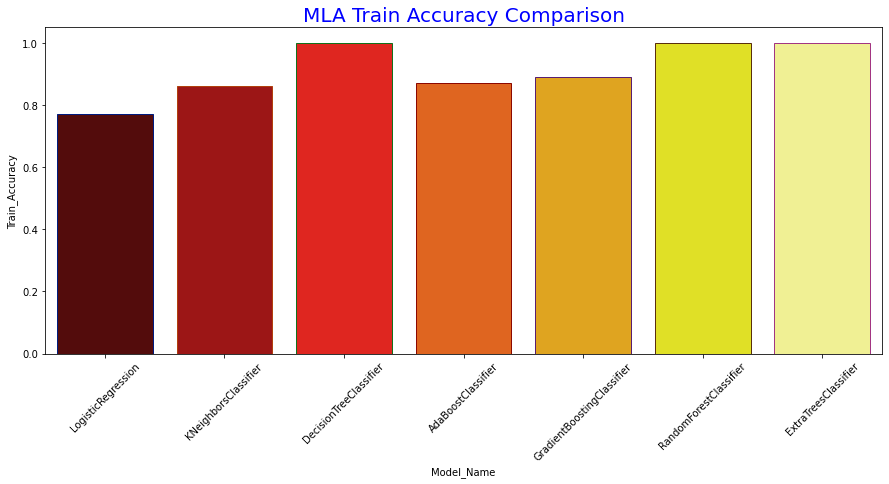

In [67]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Model_Name", y="Train_Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=45)
plt.title('MLA Train Accuracy Comparison',fontdict={'fontsize':20,'color':'blue'})
plt.show()

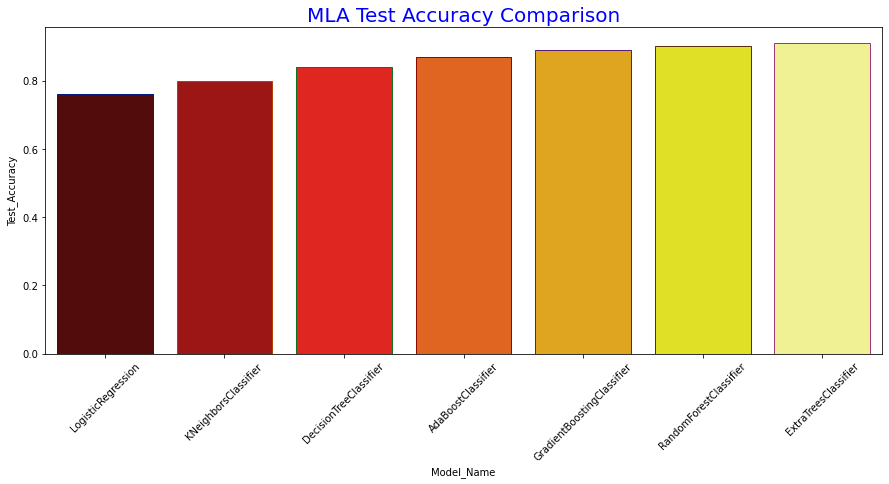

In [68]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Model_Name", y="Test_Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=45)
plt.title('MLA Test Accuracy Comparison',fontdict={'fontsize':20,'color':'blue'})
plt.show()

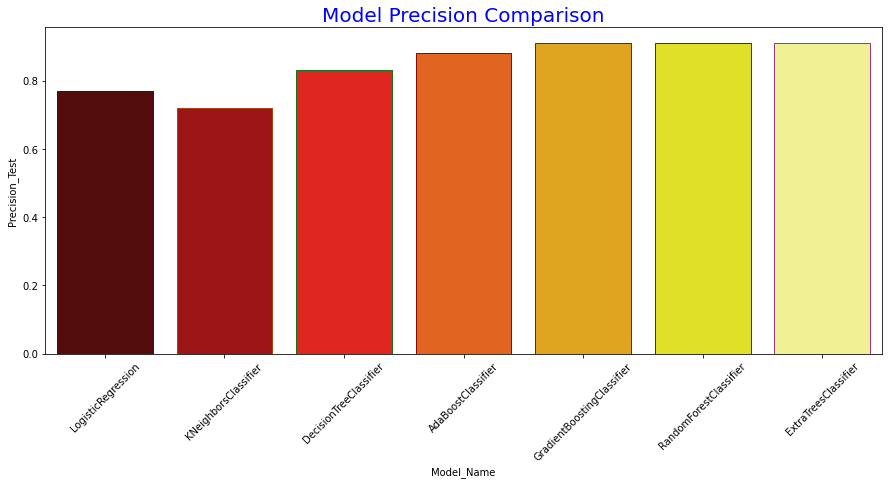

In [69]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Model_Name", y="Precision_Test",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=45)
plt.title('Model Precision Comparison',fontdict={'fontsize':20,'color':'blue'})
plt.show()

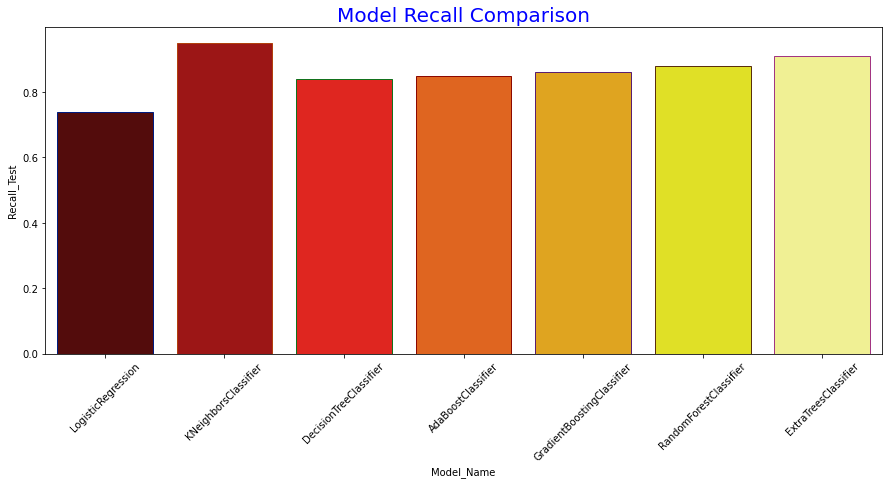

In [70]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Model_Name", y="Recall_Test",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=45)
plt.title('Model Recall Comparison',fontdict={'fontsize':20,'color':'blue'})
plt.show()

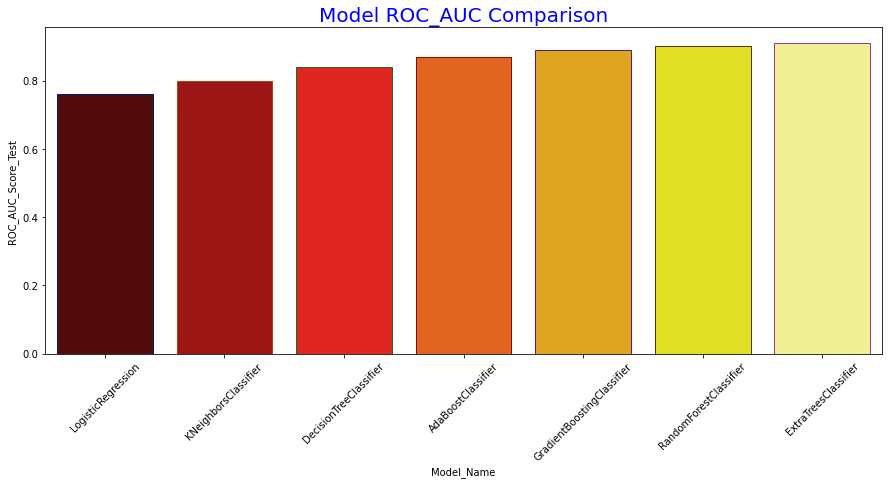

In [71]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Model_Name", y="ROC_AUC_Score_Test",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=45)
plt.title('Model ROC_AUC Comparison',fontdict={'fontsize':20,'color':'blue'})
plt.show()

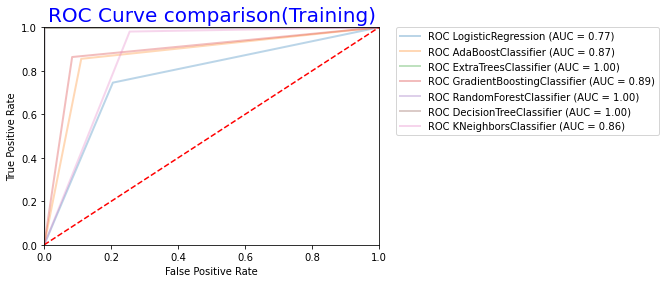

In [72]:

index = 1
for alg in MLA:
    
    
    predicted = alg.fit(X_train_smote, y_train_smote).predict(X_test_smote)
    fp, tp, th = metrics.roc_curve(y_train_smote,alg.predict(X_train_smote))
    roc_auc_mla_train = metrics.auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla_train))
   
    index+=1

plt.title('ROC Curve comparison(Training)',fontdict={'fontsize':20,'color':'blue'})
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()

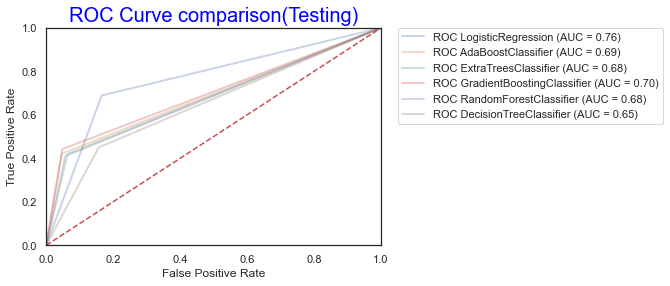

In [531]:
index = 1
for alg in MLA:
    
    
    predicted = alg.fit(X_train_smote, y_train_smote).predict(X_test_smote)
    fp, tp, th = metrics.roc_curve(y_test_smote,predicted)
    roc_auc_mla = metrics.auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
   
    index+=1

plt.title('ROC Curve comparison(Testing)',fontdict={'fontsize':20,'color':'blue'})
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()